In [42]:
from numpy import load, where
from nansat import Nansat, Domain
from matplotlib import pyplot as plt

%matplotlib inline

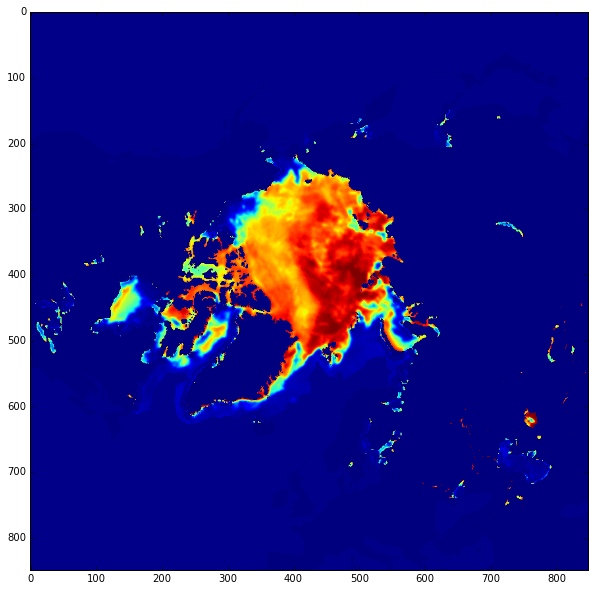

In [43]:
data = load('ice_conc.npy')
lats = load('lats.npy')
lons = load('lons.npy')

# quickly clean up low negative values
data = where(data<0, -1, data)


fig = plt.figure(figsize = (10,10))
plt.imshow(data[0])

In [44]:
# use lats and lons as you would do it for swath data
src_domain = Domain(lat=lats, lon=lons)
src_dset = Nansat(domain=src_domain)
src_dset.add_band(data[0])

In [45]:
extent = "-te -3850000.0 -5350000.0 3750000.0 5850000.0 -ts 760 1120"
proj_string = "+proj=stere +lat_0=90 +lat_ts=70 +lon_0=0 +k=1 +ellps=WGS84"
target_domain = Domain(proj_string, extent)

In [46]:
# nearest neighbour resampling
src_dset.reproject(target_domain, eResampleAlg=1)

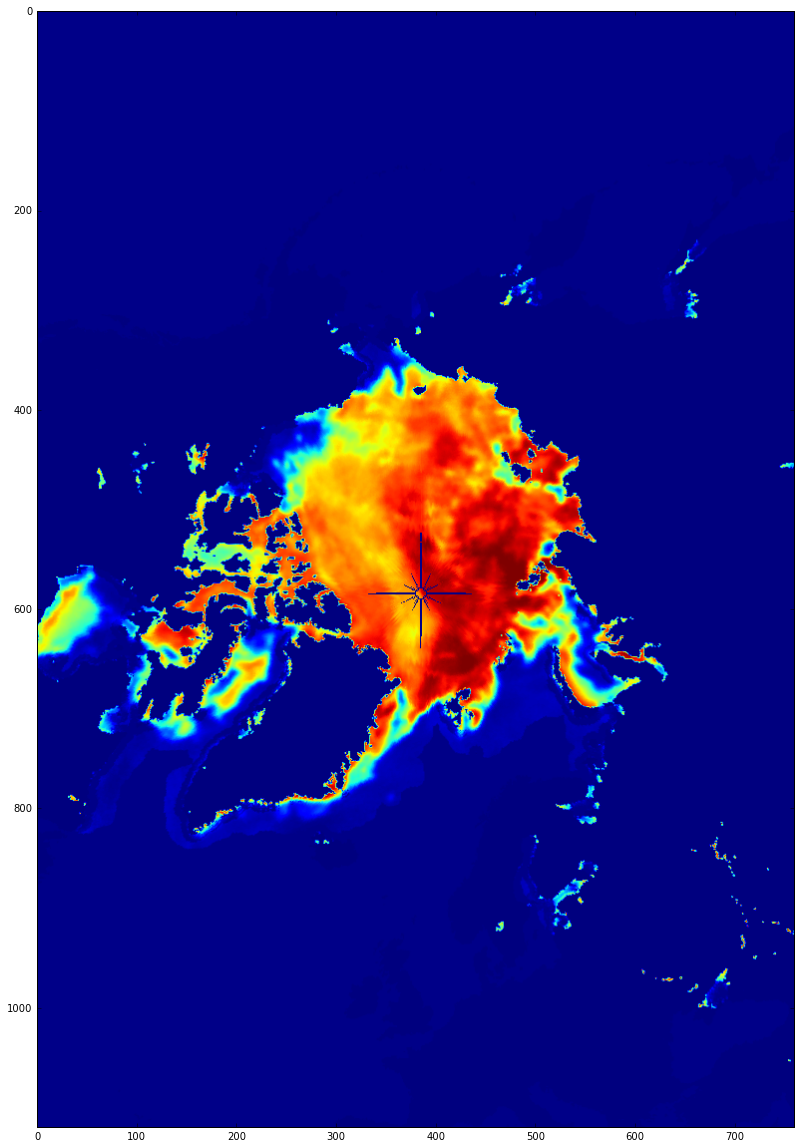

In [47]:
fig = plt.figure(figsize=(30,20))
plt.imshow(src_dset.vrt.dataset.ReadAsArray())